   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
Iris-setosa        50
Iris-versicolor 

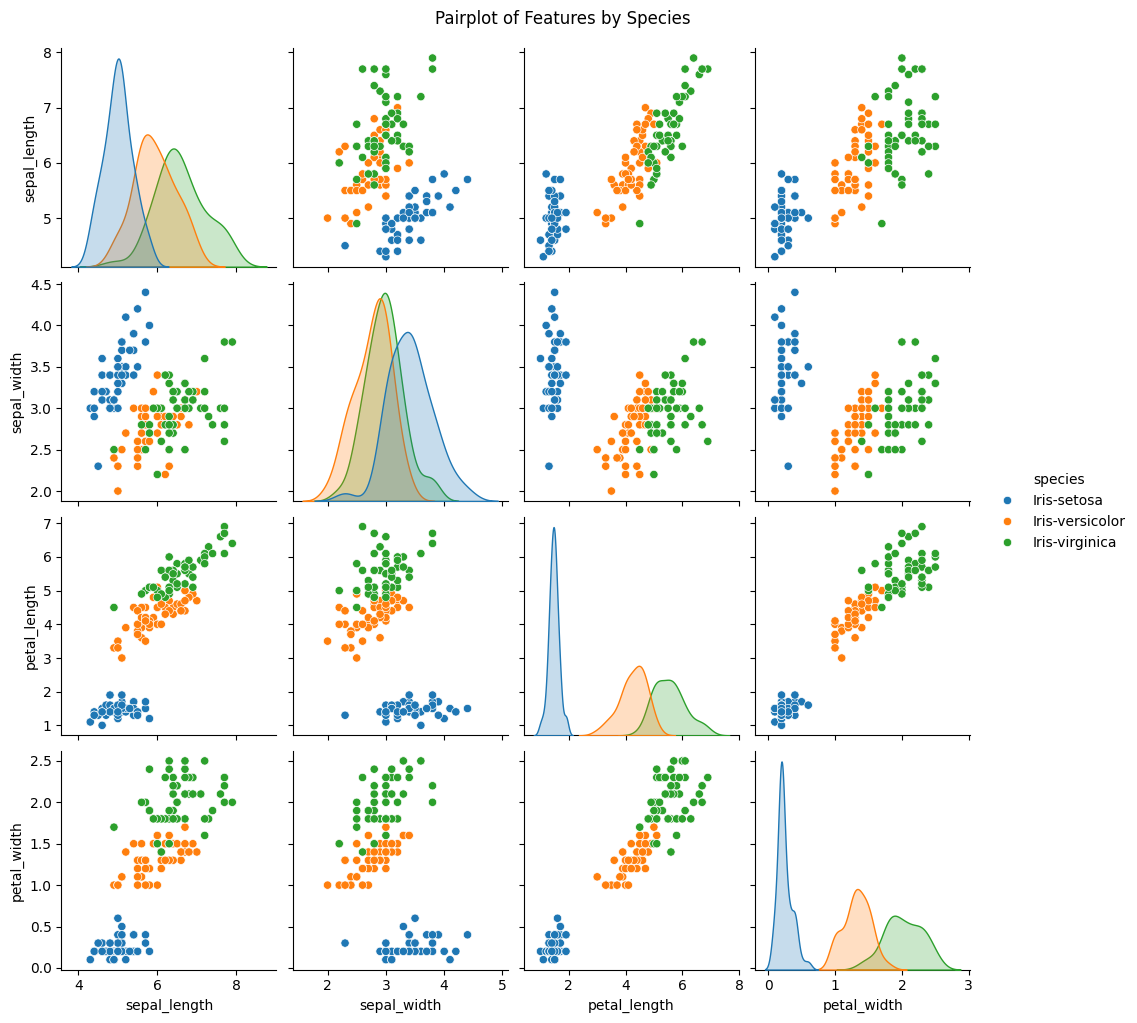

Explained variance by PC1 & PC2: [0.72770452 0.23030523]


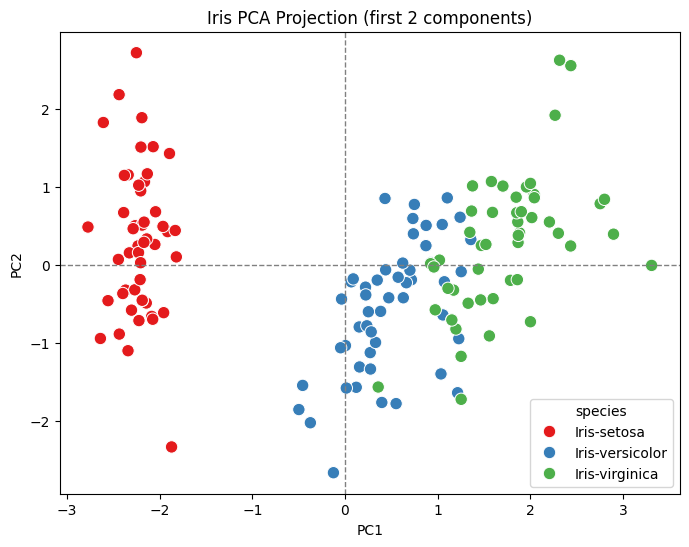

KNN on original features:
Accuracy: 0.933
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



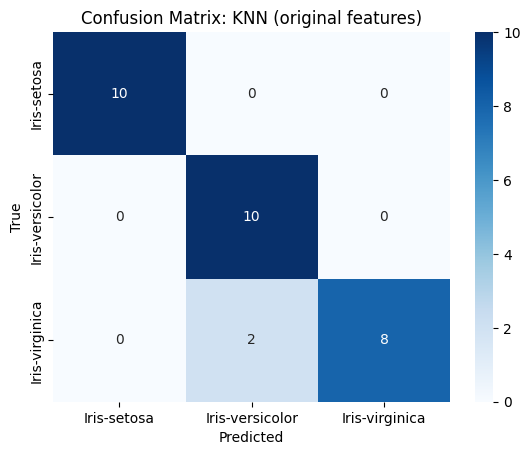

KNN on top 2 PCs:
Accuracy: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



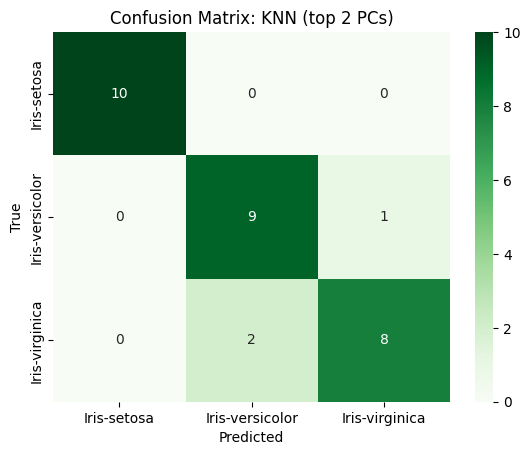

In [14]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML preprocessing & models
from sklearn.preprocessing import StandardScaler       # for feature scaling
from sklearn.decomposition import PCA                  # for dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier     # KNN algorithm
from sklearn.model_selection import train_test_split   # splitting dataset
from sklearn.metrics import classification_report, confusion_matrix  # evaluation metrics

# ---------------------------------------------------------
# 1. Load the Iris dataset from UCI Repository
# ---------------------------------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=col_names)

# ---------------------------------------------------------
# 2. Basic exploratory data analysis (EDA)
# ---------------------------------------------------------
print(df.head())                 # show first 5 rows of dataset
print(df.describe())             # summary statistics of numerical features
print(df['species'].value_counts())  # how many samples per species

# Pairplot: visualize pairwise relationships between features
sns.pairplot(df, hue='species', vars=['sepal_length','sepal_width','petal_length','petal_width'])
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

# ---------------------------------------------------------
# 3. Standardize features & apply PCA
# ---------------------------------------------------------
# Select features (X) and labels (y)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]     # independent variables
y = df['species']    # target variable

# Scale features so that each has mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce from 4D → 2D (for visualization only)
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

print("Explained variance by PC1 & PC2:", pca.explained_variance_ratio_)

# Scatter plot using PCA-reduced features
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette='Set1', s=80)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris PCA Projection (first 2 components)')
plt.axhline(0, color='grey', lw=1, linestyle='--')
plt.axvline(0, color='grey', lw=1, linestyle='--')
plt.show()

# ---------------------------------------------------------
# 4. KNN classification using original 4 features
# ---------------------------------------------------------
# Split into train/test sets (80/20 split, stratified to balance classes)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Initialize KNN model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)    # train model
y_pred = knn.predict(X_test) # predict test set labels

# Print accuracy and classification metrics
print("KNN on original features:")
print("Accuracy:", np.round(knn.score(X_test, y_test),3))
print(classification_report(y_test, y_pred, target_names=knn.classes_))

# Confusion matrix heatmap (true vs predicted labels)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.title("Confusion Matrix: KNN (original features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ---------------------------------------------------------
# 5. KNN classification using PCA-reduced features (PC1 & PC2 only)
# ---------------------------------------------------------
# Train-test split on PCA-transformed data
X_pca_train, X_pca_test, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.2,
                                                              random_state=42, stratify=y)

# Train KNN on reduced features
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train2)
y_pred_pca = knn_pca.predict(X_pca_test)

# Print accuracy and classification metrics
print("KNN on top 2 PCs:")
print("Accuracy:", np.round(knn_pca.score(X_pca_test, y_test2),3))
print(classification_report(y_test2, y_pred_pca, target_names=knn_pca.classes_))

# Confusion matrix heatmap for PCA-based KNN
cm2 = confusion_matrix(y_test2, y_pred_pca)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=knn_pca.classes_,
            yticklabels=knn_pca.classes_)
plt.title("Confusion Matrix: KNN (top 2 PCs)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
